# Taxi Trip Duration Prediction using Multiple Linear Regression

In [251]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<h2>Data Preparation</h2>

In [252]:
data_sample = pd.read_csv('train.csv')

In [253]:
#data.head()

In [254]:
#data.shape

In [255]:
#data_sample = data.sample(frac=0.5, replace=False, random_state=1)

In [256]:
data_sample

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982,40.746,-73.995,40.740,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.001,40.747,-73.970,40.797,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959,40.769,-74.004,40.707,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982,40.749,-73.975,40.757,N,373


In [257]:
data_sample.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [258]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Attribute Explanation:
* id : a unique identifier for each trip
* vendor_id : a code indicating the provider associated with the trip record
* pickup_datetime : date and time when the meter was engaged
* dropoff_datetime : date and time when the meter was disengaged
* passenger_count : the number of passengers in the vehicle (driver entered value) 
* pickup_longitude : the longitude where the meter was engaged
* pickup_latitude : the latitude where the meter was engaged
* dropoff_longitude : the longitude where the meter was disengaged
* dropoff_latitude : the latitude where the meter was disengaged
* store_and_fwd_flag : this flag indicates whether the trip record was held in vehicle memory or not. Y = Yes Stored, N = Not Stored
* trip_duration : duration of the trip in seconds

In [259]:
data_sample.drop(columns= ['id','pickup_datetime','dropoff_datetime'], inplace=True)

In [260]:
data_sample[['store_and_fwd_flag','vendor_id']] = data_sample[['store_and_fwd_flag','vendor_id']].astype('category')

<h2>Exploratory Data Analysis</h2>

<h4>Pair plot between numerical variable</h4>

In [261]:
from sklearn import preprocessing
for_scale = data_sample.select_dtypes(exclude='category')
for_join = data_sample.select_dtypes('category')
# Get column names first
names = for_scale.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(data_sample.select_dtypes(exclude='category'))
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [262]:
scaled_df = scaled_df.join(for_join)

In [263]:
scaled_df.describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,-0.000,-0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.267,-676.426,-194.373,-678.903,-238.800,-0.183
25%,-0.506,-0.259,-0.413,-0.254,-0.443,-0.107
50%,-0.506,-0.116,0.097,-0.090,0.076,-0.057
75%,0.255,0.087,0.530,0.147,0.502,0.022
max,5.582,178.246,338.497,178.897,88.303,673.102


<Figure size 864x864 with 0 Axes>

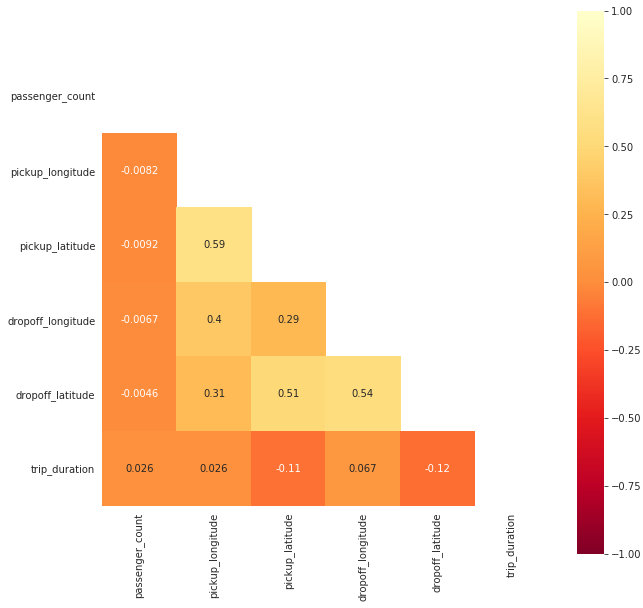

In [264]:
pd.set_option('precision', 3)
correlation=scaled_df.corr(method='spearman')
# heatmap of the correlation 
plt.figure(figsize=(12,12))
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(correlation, mask=mask, square=True,annot=True,vmin=-1,vmax=1,cmap="YlOrRd_r")


In [265]:

from scipy import stats

def check_linearity(data, target_var, SL = 0.05):
    cor_test_list = []
    for col in data.drop(target_var, axis = 1).columns:
        if col in data.select_dtypes('category').columns:
            cor_test = stats.spearmanr(data[col], data[target_var])
            cor_type = "Spearman"
        else:
            cor_test = stats.pearsonr(data[col], data[target_var])
            cor_type = "Pearson"
            cor_dict = {"Predictor": col,
                    "Type": cor_type,
                    "Correlation": cor_test[0],
                    "P-Value": cor_test[1],
                    "Conclusion": "significant" if cor_test[1] < SL else "not significant"}
            cor_test_list.append(cor_dict)
    return pd.DataFrame(cor_test_list)

check_linearity(scaled_df, "trip_duration")

,Predictor,Type,Correlation,P-Value,Conclusion
0,passenger_count,Pearson,0.008,0.000,significant
1,pickup_longitude,Pearson,0.027,0.000,significant
2,pickup_latitude,Pearson,-0.029,0.000,significant
3,dropoff_longitude,Pearson,0.015,0.000,significant
4,dropoff_latitude,Pearson,-0.021,0.000,significant


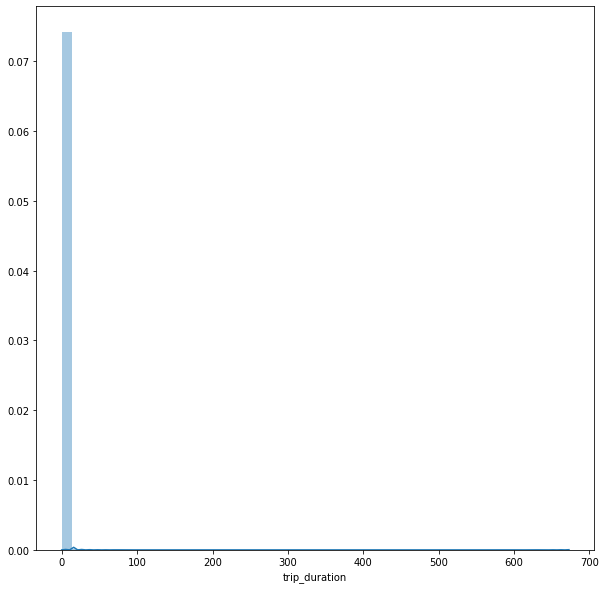

In [266]:
plt.figure(figsize=(10,10))
plt.tight_layout()
sns.distplot(scaled_df['trip_duration'])

Modelling

In [267]:
X_ = scaled_df.drop(["trip_duration"], axis = 1)
y = scaled_df.trip_duration.values

In [268]:
X = pd.get_dummies(X_, columns = scaled_df.select_dtypes('category').columns, drop_first = True)
X.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id_2,store_and_fwd_flag_Y
0,-0.506,-0.122,0.517,0.124,0.385,1,0
1,-0.506,-0.098,-0.376,-0.369,-0.575,0,0
2,-0.506,-0.078,0.396,-0.452,-1.162,1,0
3,-0.506,-0.516,-0.941,-0.550,-1.256,1,0
4,-0.506,0.006,1.286,0.007,0.856,1,0


In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("y Train:", y_train.shape)
print("y Test:", y_test.shape)

X Train: (1166915, 7)
X Test: (291729, 7)
y Train: (1166915,)
y Test: (291729,)


In [270]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [271]:
predictions = lm.predict(X_test)
pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
pred1 = pred.head(10)
pred1

,Actual,Predicted
0,0.015,0.019
1,-0.025,0.008
2,-0.066,0.022
3,-0.018,0.028
4,0.765,0.148
5,-0.112,0.002
6,0.056,-0.006
7,-0.155,-0.027
8,0.103,0.031
9,0.011,-0.094


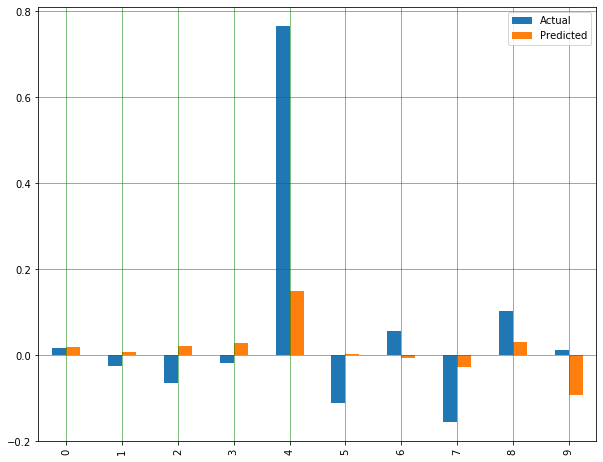

In [272]:
pred1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

0.005525973949426666


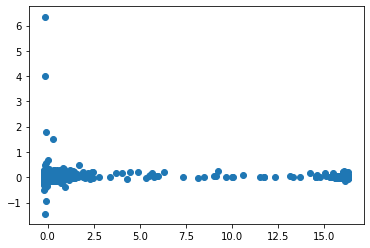

In [273]:
print(lm.score(X_test,y_test))
plt.scatter(y_test,predictions)

In [274]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.11647342785942014
Mean Squared Error: 0.38399756622230685
Root Mean Squared Error: 0.6196753716441431


In [275]:
#mencari model regresi
model=sm.OLS(y,X).fit()
prediction=model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              405.8
Date:                Sun, 17 May 2020   Prob (F-statistic):                        0.00
Time:                        19:26:31   Log-Likelihood:                     -2.0683e+06
No. Observations:             1458644   AIC:                                  4.137e+06
Df Residuals:                 1458637   BIC:                                  4.137e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
passenger_count          0.0058      0.001      6.873      0.000       0.004       0.007
pickup_longitude         0.0348      0.001     25.906      0.000       0.032       0.037
pickup_latitude         -0.0232      0.001    -24.189      0.000      -0.025      -0.021
dropoff_longitude       -0.0085      0.001     -6.283      0.000      -0.011      -0.006
dropoff_latitude        -0.0116      0.001    -12.158      0.000      -0.014      -0.010
vendor_id_2              0.0172      0.001     14.932      0.000       0.015       0.019
store_and_fwd_flag_Y     0.0166      0.011      1.494      0.135      -0.005       0.038
================================================================================
Omnibus:                  8290931.570   Durbin-Watson:                     2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   2258267016156290.000
Skew:                         344.009   Prob(JB):                           0.00
Kurtosis:                  192762.524   Cond. No.                           18.4
================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4>Model without Store and fwd flag Y</h4>

In [280]:
X_new = scaled_df.drop(['trip_duration','store_and_fwd_flag'], axis = 1)
y_new = scaled_df.trip_duration.values

In [283]:
X_new.dtypes

passenger_count       float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
vendor_id            category
dtype: object

In [285]:
X_new = pd.get_dummies(X_new, columns = ['vendor_id'], drop_first = True)


In [287]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("y Train:", y_train.shape)
print("y Test:", y_test.shape)

X Train: (1166915, 6)
X Test: (291729, 6)
y Train: (1166915,)
y Test: (291729,)


In [288]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [289]:
predictions = lm.predict(X_test)
pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
pred1 = pred.head(10)
pred1

,Actual,Predicted
0,0.015,0.019
1,-0.025,0.008
2,-0.066,0.022
3,-0.018,0.028
4,0.765,0.149
5,-0.112,0.002
6,0.056,-0.007
7,-0.155,-0.027
8,0.103,0.031
9,0.011,-0.093


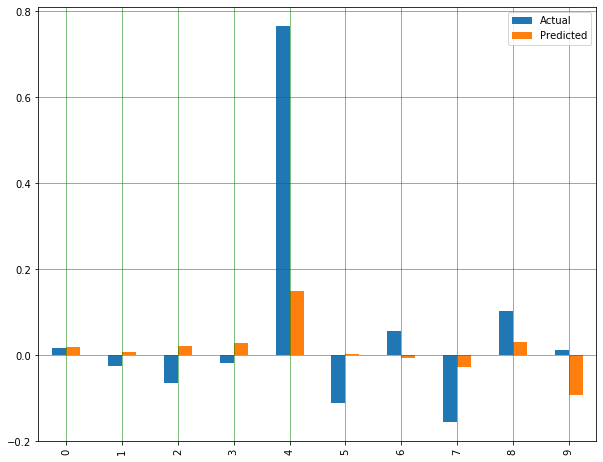

In [290]:
pred1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

0.005506931481531363


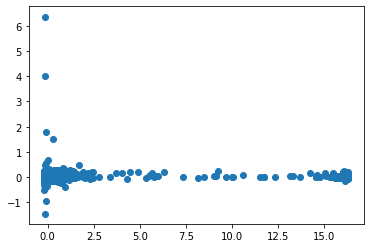

In [291]:
print(lm.score(X_test,y_test))
plt.scatter(y_test,predictions)